In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pl
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime as dt
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde, skew, pearsonr
from sklearn.neighbors import KernelDensity
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN

In [5]:
import io
import fitz
from PIL import Image

file = 'lock.pdf'
pdf_file = fitz.open(file)

# in case there is a need to loop through multiple PDF pages
for page_number in range(len(pdf_file)):
    page = pdf_file[page_number]
    rgb = page.get_pixmap()
    pil_image = Image.open(io.BytesIO(rgb.tobytes()))
    
im1 = pil_image.convert('RGB')


file = 'open_lock.pdf'
pdf_file = fitz.open(file)

# in case there is a need to loop through multiple PDF pages
for page_number in range(len(pdf_file)):
    page = pdf_file[page_number]
    rgb = page.get_pixmap()
    pil_image = Image.open(io.BytesIO(rgb.tobytes()))
    
im2 = pil_image.convert('RGB')

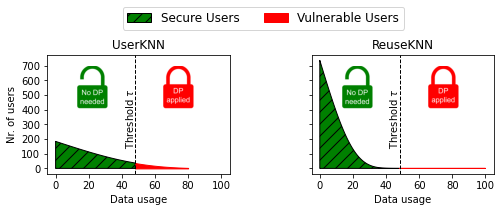

In [40]:
%matplotlib inline
def double_exponential(x, alpha):
    return 1 / np.exp(np.exp(alpha * x))

fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True, sharex=True)

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.02) * 0.5
threshold = x[np.argmax(np.gradient(np.gradient(x_)))]
ax[0].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", label="Secure Users", edgecolor="black", hatch="//")
ax[0].fill_between(x[x >= threshold][:-200], 0, x_[x >= threshold][:-200], color="red", label="Vulnerable Users")
ax[0].axvline(x=threshold, linestyle="dashed", linewidth=1, color="black")
ax[0].set_ylabel("Nr. of users")
ax[0].set_xlabel("Data usage")
ax[0].text(threshold-7, 0.15, r"Threshold $\tau$", rotation=90)
#ax[0].text(threshold+2, 0.1, "Data usage\n" + r"threshold $\tau$", color="black")

ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax[0].set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700])
#ax[0].set_ylim([0, 1])
ax[0].set_title("UserKNN")
#ax[0].legend()

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.05) * 2 #double_exponential(x, alpha=0.06) * 2
ax[1].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", edgecolor="black", hatch="//")
ax[1].fill_between(x[x >= threshold], 0, x_[x >= threshold], color="red", hatch="//")
#ax[1].fill_between(np.linspace(95, 100, 200), 0, x_[:200][::-1] * 0.5, color="red")
#plt.plot(np.linspace(90, 100, 200), x_[:200][::-1]*0.5)
ax[1].axvline(x=threshold, c="black", linestyle="dashed", linewidth=1)
ax[1].text(threshold-7, 0.15, r"Threshold $\tau$", rotation=90, color="black")
#ax[1].text(threshold+2, 0.1, "Data usage\n" + r"threshold $\tau$", color="black")
ax[1].set_xlabel("Data usage")
ax[1].set_title("ReuseKNN")
#ax[1].legend()


colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = [r"Full$_{DP}$", "UserKNN", r"UserKNN$_{DP}$", r"UserKNN+Reuse$_{DP}$", r"Expect$_{DP}$", r"Expect+Reuse$_{DP}$", r"Gain$_{DP}$", r"Gain+Reuse$_{DP}$"]

fig.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1), fontsize="large")
fig.subplots_adjust(top=.75, bottom=0.2, hspace=0.45, wspace=0.45)

newax = fig.add_axes([0.18,0.5,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im1)
newax.axis('off')

newax = fig.add_axes([0.64,0.5,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im1)
newax.axis('off')


newax = fig.add_axes([0.03,0.5,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im2)
newax.axis('off')

newax = fig.add_axes([0.49,0.5,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im2)
newax.axis('off')

plt.savefig("intro.png", dpi=400)